In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset (ajuste o separador se necessário)
df = pd.read_csv("boardgame-geek-dataset_organized.csv", sep=",", low_memory=False)

# Diagnóstico inicial: mostrar nomes das colunas
print("Colunas disponíveis:", df.columns.tolist())

# Visualizar primeiras linhas
print(df.head())


Colunas disponíveis: ['row_id', 'boardgame', 'release_year', 'min_players', 'max_players', 'min_playtime', 'max_playtime', 'minimum_age', 'avg_rating', 'num_ratings', 'complexity', 'rank_overall', 'owned', 'wishlisted', 'total_plays', 'fans', 'page_views', 'amazon_price', 'std_deviation', 'comments', 'monthly_plays', 'previously_owned', 'for_trade', 'want_trade', 'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5', 'rating_6', 'rating_7', 'rating_8', 'rating_9', 'rating_10', 'categories', 'mechanics', 'families', 'designers', 'artists', 'publishers', 'solo_designers', 'developers', 'graphic_designers', 'sculptors', 'editors', 'writers', 'insert_designers', 'rank_strategy', 'rank_thematic', 'rank_family', 'rank_war', 'rank_customizable', 'rank_abstract', 'rank_party', 'rank_childrens', 'url', 'description']
   row_id                          boardgame  release_year  min_players  \
0       1                  Brass: Birmingham          2018            2   
1       2          Pandem

In [4]:
# Informações gerais
print(df.info())

# Estatísticas descritivas das colunas numéricas
print(df.describe())

# Exemplo: se a coluna de nota média for 'average_rating' ou similar
if 'average_rating' in df.columns:
    print("Nota média dos jogos:", df['average_rating'].mean())
    print("Tempo médio de jogo:", df['playing_time'].mean())
    print("Desvio padrão do tempo de jogo:", df['playing_time'].std())
else:
    print("⚠️ A coluna 'average_rating' não existe. Verifique o nome correto nas colunas listadas acima.")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             2000 non-null   int64  
 1   boardgame          2000 non-null   object 
 2   release_year       2000 non-null   int64  
 3   min_players        2000 non-null   int64  
 4   max_players        2000 non-null   int64  
 5   min_playtime       2000 non-null   int64  
 6   max_playtime       2000 non-null   int64  
 7   minimum_age        2000 non-null   int64  
 8   avg_rating         2000 non-null   float64
 9   num_ratings        2000 non-null   int64  
 10  complexity         2000 non-null   float64
 11  rank_overall       2000 non-null   int64  
 12  owned              2000 non-null   int64  
 13  wishlisted         2000 non-null   int64  
 14  total_plays        2000 non-null   int64  
 15  fans               2000 non-null   int64  
 16  page_views         2000 

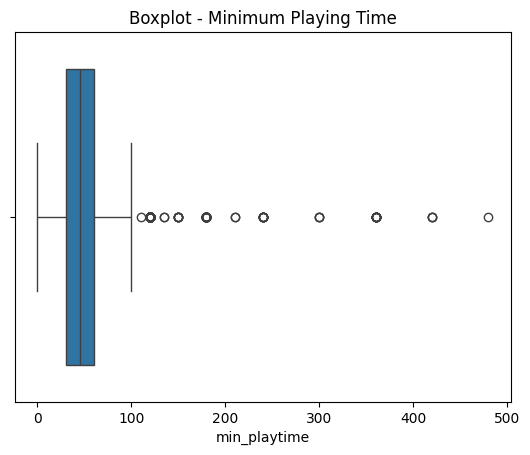

Quantidade de outliers em min_playtime: 207


In [7]:
# Preencher valores ausentes em avg_rating com a mediana
df['avg_rating'] = df['avg_rating'].fillna(df['avg_rating'].median())

# Boxplot para min_playtime (substituído de playing_time)
sns.boxplot(x=df['min_playtime'])
plt.title("Boxplot - Minimum Playing Time")
plt.show()

# IQR para min_playtime (substituído de playing_time)
Q1 = df['min_playtime'].quantile(0.25)
Q3 = df['min_playtime'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR
outliers = df[(df['min_playtime'] < limite_inferior) | (df['min_playtime'] > limite_superior)]
print("Quantidade de outliers em min_playtime:", len(outliers))


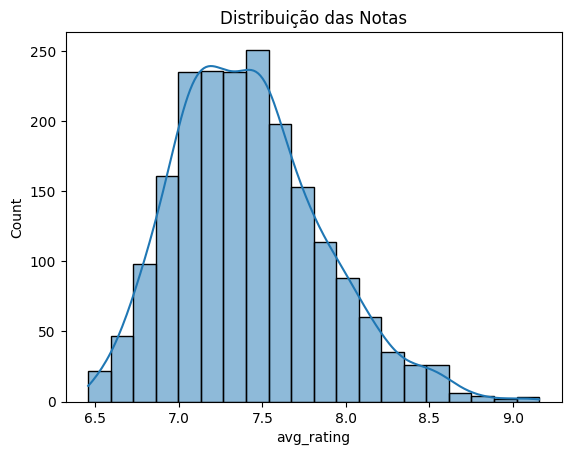

KeyError: 'playing_time'

In [8]:
# Histograma de avg_rating
sns.histplot(df['avg_rating'], bins=20, kde=True)
plt.title("Distribuição das Notas")
plt.show()

# Transformação logarítmica em playing_time
df['playing_time_log'] = np.log1p(df['playing_time'])

# Comparação antes e depois
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['playing_time'], bins=20, ax=axes[0])
axes[0].set_title("Playing Time Original")
sns.histplot(df['playing_time_log'], bins=20, ax=axes[1])
axes[1].set_title("Playing Time Log Transformado")
plt.show()



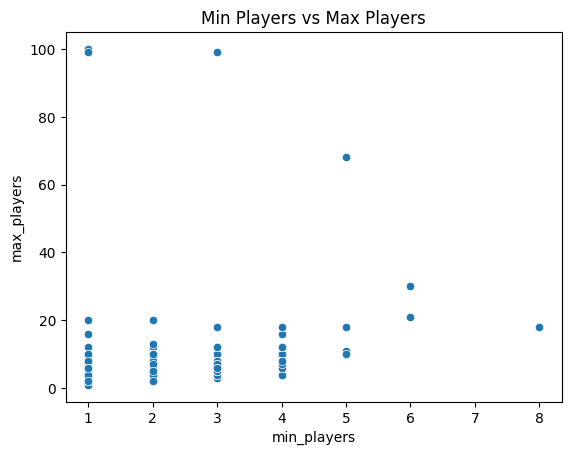

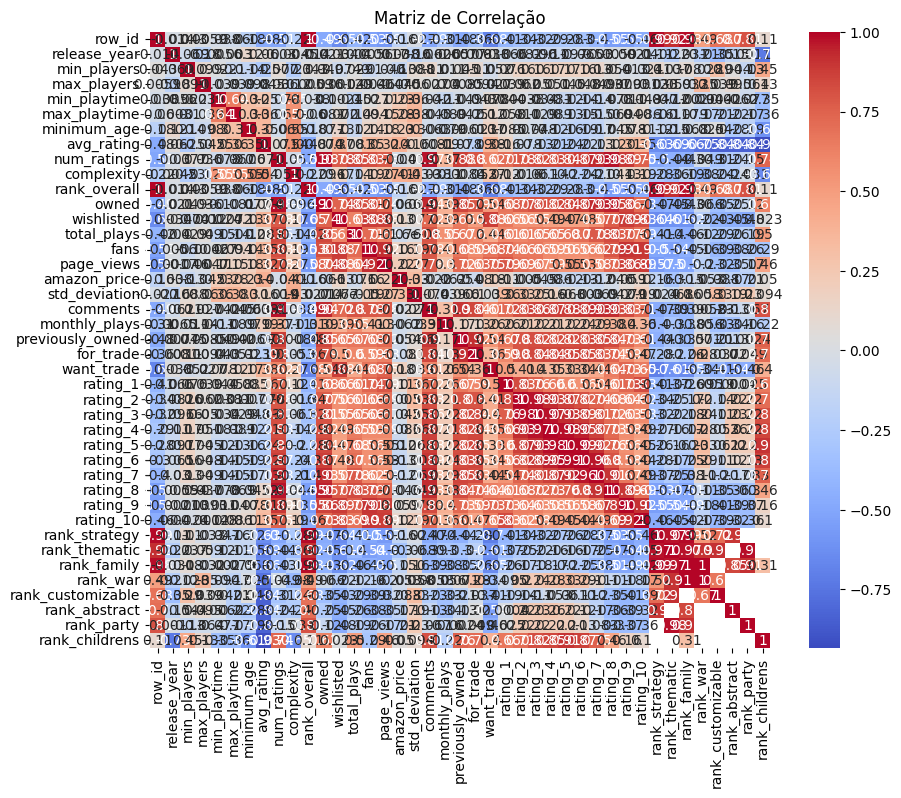

Maior correlação positiva: row_id         row_id           1.000000
               rank_overall     0.999998
rank_strategy  rank_family      0.990326
rank_overall   rank_strategy    0.988496
row_id         rank_strategy    0.988492
dtype: float64
Correlação mais próxima de zero: total_plays   std_deviation    0.000016
rating_1      rank_abstract    0.000397
release_year  rank_party       0.001109
max_players   wishlisted       0.001178
              rating_10       -0.001250
dtype: float64


/tmp/ipython-input-1148912504.py:18: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  print("Correlação mais próxima de zero:", corr_pairs.iloc[(corr_pairs.abs().argsort()[:5])])


In [9]:
# Scatter plot min_players vs max_players
sns.scatterplot(x='min_players', y='max_players', data=df)
plt.title("Min Players vs Max Players")
plt.show()

# Matriz de correlação
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Identificar maior correlação positiva e mais próxima de zero
corr_pairs = corr.unstack().drop_duplicates()
print("Maior correlação positiva:", corr_pairs.sort_values(ascending=False).head())
print("Correlação mais próxima de zero:", corr_pairs.iloc[(corr_pairs.abs().argsort()[:5])])



Decada
0          3
1470       1
1580       1
1630       1
1800       1
1810       1
1850       1
1870       1
1920       1
1950       1
1960       2
1970       9
1980      25
1990      74
2000     280
2010    1031
2020     567
Name: count, dtype: int64


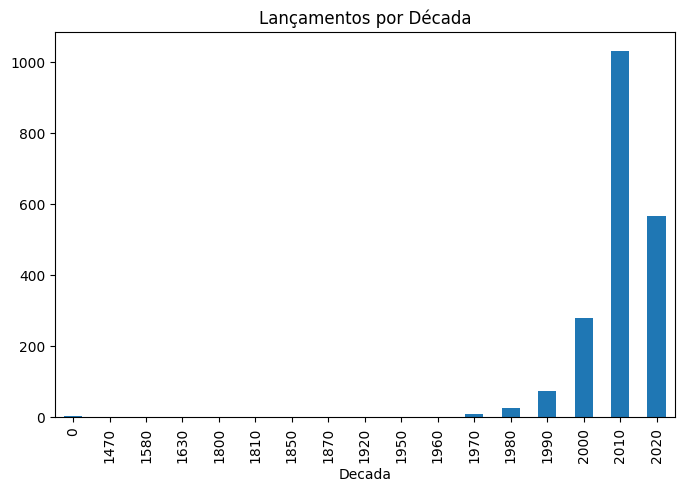

In [10]:
# Criar coluna de década
df['Decada'] = (df['release_year']//10)*10

# Contagem por década
decada_counts = df['Decada'].value_counts().sort_index()
print(decada_counts)

# Visualização
decada_counts.plot(kind='bar', figsize=(8,5))
plt.title("Lançamentos por Década")
plt.show()

